In [1]:
from pathlib import Path

import numpy
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
strainGE_dir= Path("../Respiratory/StrainGE/")
#strainGE_dir= Path("../Respiratory/MAGs_StrainGE/")

In [3]:
straingst_df = pd.read_table(strainGE_dir/"StrainGST.tsv", index_col=[0,1])
straingst_df.head()

i  gkmers  ikmers  skmers    cov   kcov  \
Sample  strain                                                                  
C163-2m Stre_pneumoniae_M26365        0   21131   21101   54076  0.950  7.382   
        Stap_saccharolyticus_13T0028  1   23081   23063   34026  0.922  3.298   
C225-4m Stre_pneumoniae_G54           0   19948   19933   33501  0.429  1.525   
        Stre_lactarius_CCUG_66490     1   20979   20566   24949  0.315  1.705   
C136-2m Stap_epidermidis_IVB6210      0   24573   24565   21211  0.587  1.858   

                                       gcov   acct   even   spec  rapct  \
Sample  strain                                                            
C163-2m Stre_pneumoniae_M26365        6.879  0.610  0.951  0.991  0.340   
        Stap_saccharolyticus_13T0028  3.014  0.741  0.970  1.003  0.208   
C225-4m Stre_pneumoniae_G54           0.633  0.270  0.914  0.949  0.060   
        Stre_lactarius_CCUG_66490     0.533  0.313  0.764  1.004  0.047   
C136-2m Stap_epidermidis_IVB6210      1.076  0.717  0.891  1.005  0.092   

                                      old_rapct  wscore  score  
Sample  strain                                                  
C163-2m Stre_pneumoniae_M26365            0.334   0.520  0.524  
        Stap_saccharolyticus_13T0028      0.158   0.641  0.643  
C225-4m Stre_pneumoniae_G54               0.029   0.092  0.097  
        Stre_lactarius_CCUG_66490         0.024   0.057  0.058  
C136-2m Stap_epidermidis_IVB6210          0.147   0.333  0.335

In [4]:
STRAINGR_DIR = strainGE_dir/"Intermediate_files/StrainGR/summary/"

df_list = []
sample_names = []
for f in STRAINGR_DIR.glob("*.tsv"):
    df = pd.read_csv(f, sep='\t', index_col=0)
    df = df.drop(index='TOTAL')  # Remove TOTAL statistics

    df_list.append(df)
    sample_names.append(f.stem)

straingr_df = pd.concat(df_list, keys=sample_names, names=["sample"])

straingr_df['straingst_present'] = straingr_df.index.isin(straingst_df.index)

straingr_df.to_csv(strainGE_dir /"StrainGR_summary.tsv", sep='\t')

In [5]:
straingr_df.head()

name   length  coverage  \
sample  ref                                                                     
C047-2m Stre_pneumoniae_GPSC13_substr_ST473  NZ_LR216064.1  2066251     0.067   
        Stap_epidermidis_LM087               NZ_CP060528.1  2494355     0.113   
        Stap_saccharolyticus_13T0028         NZ_CP068029.1  2332643     0.000   
        Stre_pneumoniae_670-6B                 NC_014498.1  2240045     0.066   
        Stre_pseudopneumoniae_IS7493           NC_015875.1  2190731     0.125   

                                             uReads  abundance  median  \
sample  ref                                                              
C047-2m Stre_pneumoniae_GPSC13_substr_ST473     161      0.014       0   
        Stap_epidermidis_LM087                 1230      0.007       0   
        Stap_saccharolyticus_13T0028              6      0.000       0   
        Stre_pneumoniae_670-6B                  275      0.012       0   
        Stre_pseudopneumoniae_IS7493           1821      0.008       0   

                                             callable  callablePct  confirmed  \
sample  ref                                                                     
C047-2m Stre_pneumoniae_GPSC13_substr_ST473      4864        0.235       4857   
        Stap_epidermidis_LM087                  25920        1.039      25828   
        Stap_saccharolyticus_13T0028               57        0.002         55   
        Stre_pneumoniae_670-6B                  10009        0.447       9909   
        Stre_pseudopneumoniae_IS7493            50413        2.301      49064   

                                             confirmedPct  ...  snpPct  multi  \
sample  ref                                                ...                  
C047-2m Stre_pneumoniae_GPSC13_substr_ST473        99.856  ...   0.144      0   
        Stap_epidermidis_LM087                     99.645  ...   0.355      1   
        Stap_saccharolyticus_13T0028               96.491  ...   3.509      0   
        Stre_pneumoniae_670-6B                     99.001  ...   0.999      0   
        Stre_pseudopneumoniae_IS7493               97.324  ...   2.677     25   

                                             multiPct  lowmq  lowmqPct  high  \
sample  ref                                                                    
C047-2m Stre_pneumoniae_GPSC13_substr_ST473     0.000  20354     0.985    40   
        Stap_epidermidis_LM087                  0.004  18925     0.759     0   
        Stap_saccharolyticus_13T0028            0.000      0     0.000     0   
        Stre_pneumoniae_670-6B                  0.000  17568     0.784   112   
        Stre_pseudopneumoniae_IS7493            0.050   6118     0.279    40   

                                             highPct  gapCount  gapLength  \
sample  ref                                                                 
C047-2m Stre_pneumoniae_GPSC13_substr_ST473    0.002         0          0   
        Stap_epidermidis_LM087                 0.000         1      47232   
        Stap_saccharolyticus_13T0028           0.000         0          0   
        Stre_pneumoniae_670-6B                 0.005         0          0   
        Stre_pseudopneumoniae_IS7493           0.002         0          0   

                                             straingst_present  
sample  ref                                                     
C047-2m Stre_pneumoniae_GPSC13_substr_ST473              False  
        Stap_epidermidis_LM087                           False  
        Stap_saccharolyticus_13T0028                     False  
        Stre_pneumoniae_670-6B                           False  
        Stre_pseudopneumoniae_IS7493                     False  

[5 rows x 21 columns]

In [6]:

straingr_df['is_plasmid'] = straingr_df['length'] < 4e4
straingr_df['enough_cov'] = straingr_df['coverage'] > 0.5

straingr_df['straingst_present'] = straingr_df.index.isin(straingst_df.index)

In [7]:


# Filter and re-index
straingr_df = straingr_df[straingr_df['straingst_present'] & ~straingr_df['is_plasmid'] & straingr_df['enough_cov']].reset_index().set_index(['sample', 'ref'])
straingr_df

name   length  coverage  \
sample  ref                                                              
C246-2m Stap_capitis_BN2              NZ_CP042341.1  2455230     1.550   
        Stap_epidermidis_IVB6210      NZ_CP094729.1  2499865     0.885   
C224-2m Stap_haemolyticus_B           NZ_CP025396.1  2593418     0.861   
C008-2m Stap_aureus_HO_5096_0412        NC_017763.1  2832299     1.936   
C235-2m Stre_pneumoniae_NP7536        NZ_CP090887.1  2062504     1.257   
...                                             ...      ...       ...   
C006-2m Stap_haemolyticus_B           NZ_CP025396.1  2593418    12.711   
        Stap_epidermidis_NBRC_113846  NZ_CP084008.1  2454132    55.137   
        Stap_hominis_19A              NZ_CP031277.1  2202898    32.809   
C050-4m Stre_pneumoniae_NCTC7466      NZ_LS483374.1  2046573     0.564   
C119-4m Stre_pneumoniae_HKU1-14       NZ_CP019299.1  2038121     1.755   

                                      uReads  abundance  median  callable  \
sample  ref                                                                 
C246-2m Stap_capitis_BN2                6925      0.045       1    252501   
        Stap_epidermidis_IVB6210        9471      0.037       1    353846   
C224-2m Stap_haemolyticus_B            15798      0.112       1    635397   
C008-2m Stap_aureus_HO_5096_0412       28174      1.367       2   1101756   
C235-2m Stre_pneumoniae_NP7536          4145      0.684       0      4971   
...                                      ...        ...     ...       ...   
C006-2m Stap_haemolyticus_B           274726      0.444      12   2326674   
        Stap_epidermidis_NBRC_113846  782023      1.897      57   2017368   
        Stap_hominis_19A              527347      0.886      35   1850173   
C050-4m Stre_pneumoniae_NCTC7466        2632      1.782       0     39518   
C119-4m Stre_pneumoniae_HKU1-14        15537      2.293       1    236463   

                                      callablePct  confirmed  confirmedPct  \
sample  ref                                                                  
C246-2m Stap_capitis_BN2                   10.284     251175        99.475   
        Stap_epidermidis_IVB6210           14.155     353166        99.808   
C224-2m Stap_haemolyticus_B                24.500     634361        99.837   
C008-2m Stap_aureus_HO_5096_0412           38.900    1101517        99.978   
C235-2m Stre_pneumoniae_NP7536              0.241       4908        98.733   
...                                           ...        ...           ...   
C006-2m Stap_haemolyticus_B                89.715    2325298        99.941   
        Stap_epidermidis_NBRC_113846       82.203    2015450        99.905   
        Stap_hominis_19A                   83.988    1842591        99.590   
C050-4m Stre_pneumoniae_NCTC7466            1.931      39464        99.863   
C119-4m Stre_pneumoniae_HKU1-14            11.602     236367        99.959   

                                      ...  multiPct   lowmq  lowmqPct    high  \
sample  ref                           ...                                       
C246-2m Stap_capitis_BN2              ...     0.013  715471    29.141    2438   
        Stap_epidermidis_IVB6210      ...     0.018  238313     9.533      23   
C224-2m Stap_haemolyticus_B           ...     0.002   56966     2.197       0   
C008-2m Stap_aureus_HO_5096_0412      ...     0.007  475501    16.789       6   
C235-2m Stre_pneumoniae_NP7536        ...     0.000  728640    35.328  172516   
...                                   ...       ...     ...       ...     ...   
C006-2m Stap_haemolyticus_B           ...     0.199  281847    10.868   51609   
        Stap_epidermidis_NBRC_113846  ...     0.078  701584    28.588   46469   
        Stap_hominis_19A              ...     0.245  342678    15.556   59799   
C050-4m Stre_pneumoniae_NCTC7466      ...     0.005  249701    12.201   44365   
C119-4m Stre_pneumoniae_HKU1-14       ...     0.005  485915    23.841   90554   

             

In [10]:

# TP rate
# with references

straingr_df["Species"] = straingr_df.index.get_level_values(1).map(lambda s: " ".join(s.split("_",2)[:2]))

positiove_Spneumonae = straingr_df.query('Species=="Stre pneumoniae"').index.get_level_values(0).unique().shape[0]
positive_Saureus = straingr_df.query('Species=="Stap aureus"').index.get_level_values(0).unique().shape[0]

print(f"Detected {positiove_Spneumonae} S. pneumonae and {positive_Saureus} S. aureus")

Detected 77 S. pneumonae and 16 S. aureus


In [11]:
straingr_df.query('Species=="Stre pneumoniae"').index.get_level_values(0).unique()

Index(['C235-2m', 'C227-4m', 'C044-2m', 'C120-4m', 'C269-2m', 'C002-4m',
       'C230-2m', 'C295-2m', 'C094-4m', 'C136-4m', 'C114-2m', 'C070-4m',
       'C201-2m', 'C122-2m', 'C248-4m', 'C188-2m', 'C154-2m', 'C239-2m',
       'C186-4m', 'C229-4m', 'C101-2m', 'C257-4m', 'C051-2m', 'C020-2m',
       'C191-4m', 'C095-4m', 'C063-4m', 'C073-4m', 'C276-2m', 'C280-2m',
       'C179-2m', 'C220-2m', 'C066-4m', 'C017-2m', 'C163-2m', 'C220-4m',
       'C181-4m', 'C105-2m', 'C040-4m', 'C184-2m', 'C080-4m', 'C292-4m',
       'C081-2m', 'C155-2m', 'C201-4m', 'C060-2m', 'C275-4m', 'C082-4m',
       'C001-4m', 'C250-2m', 'C096-4m', 'C051-4m', 'C226-2m', 'C283-4m',
       'C012-2m', 'C111-4m', 'C039-4m', 'C255-4m', 'C218-2m', 'C173-2m',
       'C274-4m', 'C086-2m', 'C159-2m', 'C102-4m', 'C125-2m', 'C039-2m',
       'C226-4m', 'C167-2m', 'C106-2m', 'C179-4m', 'C166-2m', 'C273-2m',
       'C130-4m', 'C075-4m', 'C213-2m', 'C050-4m', 'C119-4m'],
      dtype='object', name='sample')

In [12]:
straingr_df.query('Species=="Stap aureus"').index.get_level_values(0).unique()

Index(['C008-2m', 'C200-2m', 'C269-2m', 'C189-4m', 'C276-2m', 'C256-2m',
       'C150-2m', 'C169-4m', 'C096-2m', 'C253-2m', 'C006-4m', 'C002-2m',
       'C096-4m', 'C003-2m', 'C189-2m', 'C277-2m'],
      dtype='object', name='sample')

# Comparison data

not yet finished

In [8]:
Comparison_dir= strainGE_dir/"Intermediate_files/StrainGR/comparisons/summary/"

# increases with time
comparison_list = list(Comparison_dir.glob("*.tsv"))
print(len(comparison_list) )

df_list =[]
for file in comparison_list:
    try: 
        df= pd.read_table(file, index_col=[0,1,2])
        df_list.append(df)
    except pd.errors.EmptyDataError:
        pass
    
compare_df = pd.concat(df_list)
compare_df.to_csv(strainGE_dir/"Comparisons_temp.tsv",sep="\t")

7701


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [59]:
compare_df

scaffold  length  common  commonPct  single  singlePct  \
sample1 sample2 ref                                                             
C017-2m C179-2m MAG64   MAG64_1  555078       0        0.0       0        0.0   
                MAG64   MAG64_2  351535       0        0.0       0        0.0   
                MAG64   MAG64_3  329403       0        0.0       0        0.0   
                MAG64   MAG64_4  312015       0        0.0       0        0.0   
                MAG64   MAG64_5  279997       0        0.0       0        0.0   
...                         ...     ...     ...        ...     ...        ...   
C023-2m C260-2m MAG70  MAG70_38    8680       0        0.0       0        0.0   
                MAG70  MAG70_39    6544       0        0.0       0        0.0   
                MAG70  MAG70_40    5953       0        0.0       0        0.0   
                MAG70  MAG70_41    3327       0        0.0       0        0.0   
                MAG70  MAG70_42    3302       0        0.0       0        0.0   

                       singleAgree  singleAgreePct  multi  multiPct  ...  \
sample1 sample2 ref                                                  ...   
C017-2m C179-2m MAG64            0             0.0      0       0.0  ...   
                MAG64            0             0.0      0       0.0  ...   
                MAG64            0             0.0      0       0.0  ...   
                MAG64            0             0.0      0       0.0  ...   
                MAG64            0             0.0      0       0.0  ...   
...                            ...             ...    ...       ...  ...   
C023-2m C260-2m MAG70            0             0.0      0       0.0  ...   
                MAG70            0             0.0      0       0.0  ...   
                MAG70            0             0.0      0       0.0  ...   
                MAG70            0             0.0      0       0.0  ...   
                MAG70            0             0.0      0       0.0  ...   

                       variantExactPct  AnotB  AnotBpct  BnotA  BnotApct  \
sample1 sample2 ref                                                        
C017-2m C179-2m MAG64              0.0      0       0.0      0       0.0   
                MAG64              0.0      0       0.0      0       0.0   
                MAG64              0.0      0       0.0      0       0.0   
                MAG64              0.0      0       0.0      0       0.0   
                MAG64              0.0      0       0.0      0       0.0   
...                                ...    ...       ...    ...       ...   
C023-2m C260-2m MAG70              0.0      0       0.0      0       0.0   
                MAG70              0.0      0       0.0      0       0.0   
                MAG70              0.0      0       0.0      0       0.0   
                MAG70              0.0      0       0.0      0       0.0   
                MAG70              0.0      0       0.0      0       0.0   

                        Agaps  AgapPct  Bgaps  BgapPct  gapJaccardSim  
sample1 sample2 ref                                                    
C017-2m C179-2m MAG64       0      0.0      0      0.0            1.0  
                MAG64  351535      0.0      0      0.0            0.0  
                MAG64       0      0.0      0      0.0            1.0  
                MAG64       0      0.0      0      0.0            1.0  
                MAG64       0      0.0      0      0.0            1.0  
...                       ...      ...    ...      ...            ...  
C023-2m C260-2m MAG70       0      0.0   8680      0.0            1.0  
                MAG70       0      0.0   6544      0.0            1.0  
                MAG70       0      0.0   5953      0.0            1.0  
                MAG70       0      0.0      0      0.0            1.0  
                MAG70       0      0.0      0      0.0            1.0  

[508980 rows x 27 columns]

(77,)

(15,)

# Comparison

In [97]:

compare_df = pd.read_csv(strainGE_dir /"Comparisons_temp.tsv", sep='\t', index_col=[0, 1, 2])

In [98]:
#aggregate

compare_agg = compare_df.groupby(level=[0,1,2]).sum()
compare_agg.eval("singleAgreePct = singleAgree/single*100", inplace=True)
compare_agg.eval("commonPct = common/length*100", inplace=True)


compare_df= compare_agg

In [99]:
# comparison



unique_sample_genome = straingr_df.index.unique()

def both_straingst_present(ix):
    sample1, sample2, ref = ix

    return (sample1, ref) in unique_sample_genome and (sample2, ref) in unique_sample_genome

compare_df['both_present'] = compare_df.index.map(both_straingst_present)
compare_df = compare_df[compare_df['both_present']].copy()


# add species and genus

compare_df["Species"] = compare_df.index.get_level_values(2).map(lambda s: " ".join(s.split("_",2)[:2]))
compare_df["Genus"] = compare_df.index.get_level_values(2).str.split("_",1,expand=True).to_frame()[0].map({"Stre":"Streptococcus","Stap":"Staphylococcus"}).values




all_compare_df= compare_df.copy()


In [100]:
compare_df.head()

length   common  commonPct   single  singlePct  \
sample1 sample2 ref                                                      
C001-2m C001-4m MAG65  1883560  1519040  80.647285  1515443   997.6746   
                MAG70  1996732  1420580  71.145251  1410191  4167.8374   
        C002-2m MAG65  1883560  1373162  72.902483  1372579   999.5356   
        C002-4m MAG65  1883560   856039  45.447928   855767   999.6053   
                MAG66  1841312   812337  44.117292   812163  2299.3747   

                       singleAgree  singleAgreePct  multi  multiPct  \
sample1 sample2 ref                                                   
C001-2m C001-4m MAG65      1464634       96.647251   3597    2.3254   
                MAG70      1404598       99.603387  10389   32.1626   
        C002-2m MAG65      1346157       98.075011    583    0.4644   
        C002-4m MAG65       825912       96.511317    272    0.3947   
                MAG66       780622       96.116420    174    0.6253   

                       sharedAlleles  ...  BnotA   BnotApct   Agaps   AgapPct  \
sample1 sample2 ref                   ...                                       
C001-2m C001-4m MAG65        1468162  ...   4822    90.6002  101978  292.6934   
                MAG70        1414933  ...   7742  1869.0972   71970  300.0000   
        C002-2m MAG65        1346714  ...  13548   230.5904  101978  492.6934   
        C002-4m MAG65         826148  ...   2412    92.2292  101978  300.0000   
                MAG66         780791  ...  23184  1241.8836  106430  468.4875   

                        Bgaps   BgapPct  gapJaccardSim  both_present  Species  \
sample1 sample2 ref                                                             
C001-2m C001-4m MAG65   84181  300.0000         9.8802          True    MAG65   
                MAG70   59452  300.0000        41.2564          True    MAG70   
        C002-2m MAG65  115386  429.7943         9.9199          True    MAG65   
        C002-4m MAG65   92773  300.0000         9.8838          True    MAG65   
                MAG66  118227  441.3886        23.4143          True    MAG66   

                       Genus  
sample1 sample2 ref           
C001-2m C001-4m MAG65    NaN  
                MAG70    NaN  
        C002-2m MAG65    NaN  
        C002-4m MAG65    NaN  
                MAG66    NaN  

[5 rows x 29 columns]

In [101]:
# filter
compare_df= all_compare_df.query("commonPct>20")

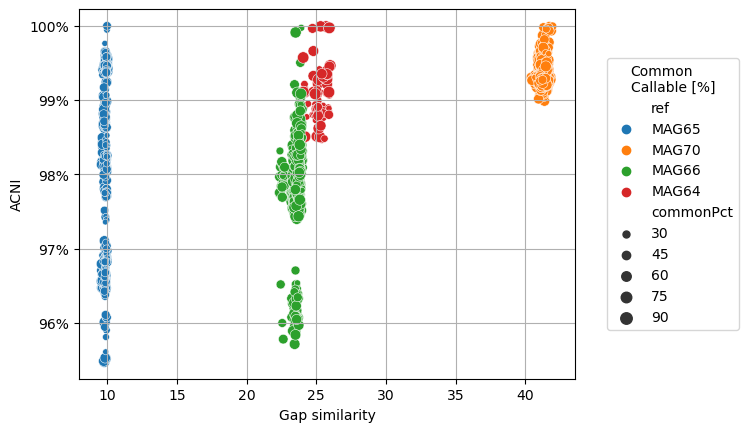

In [103]:
#plot

import seaborn as sns

sns.scatterplot(x="gapJaccardSim", y="singleAgreePct", size="commonPct", data=compare_df,hue="ref")#.query("Genus=='Streptococcus'"), hue="Species")

#plt.xlim(0.970, 1)
plt.xlabel("Gap similarity")

#plt.ylim(99.9, 100)
plt.ylabel("ACNI")
plt.gca().yaxis.set_major_formatter("{x:g}%")

plt.grid('on')
plt.legend(title="Common\nCallable [%]", loc="center left", bbox_to_anchor=(1.05, 0.5))

In [109]:
compare_df

length   common  commonPct   single  singlePct  \
sample1 sample2 ref                                                      
C001-2m C001-4m MAG65  1883560  1519040  80.647285  1515443   997.6746   
                MAG70  1996732  1420580  71.145251  1410191  4167.8374   
        C002-2m MAG65  1883560  1373162  72.902483  1372579   999.5356   
        C002-4m MAG65  1883560   856039  45.447928   855767   999.6053   
                MAG66  1841312   812337  44.117292   812163  2299.3747   
...                        ...      ...        ...      ...        ...   
C035-4m C288-4m MAG70  1996732  1417561  70.994054  1414823  4190.4919   
        C290-4m MAG70  1996732  1252505  62.727747  1250089  4190.3490   
        C291-4m MAG70  1996732   979677  49.064021   977755  4188.9189   
        C292-4m MAG70  1996732  1621547  81.210047  1610973  4172.8822   
        C300-4m MAG70  1996732  1014137  50.789841  1012357  4192.1146   

                       singleAgree  singleAgreePct  multi  multiPct  \
sample1 sample2 ref                                                   
C001-2m C001-4m MAG65      1464634       96.647251   3597    2.3254   
                MAG70      1404598       99.603387  10389   32.1626   
        C002-2m MAG65      1346157       98.075011    583    0.4644   
        C002-4m MAG65       825912       96.511317    272    0.3947   
                MAG66       780622       96.116420    174    0.6253   
...                            ...             ...    ...       ...   
C035-4m C288-4m MAG70      1403837       99.223507   2738    9.5081   
        C290-4m MAG70      1241235       99.291730   2416    9.6510   
        C291-4m MAG70       970495       99.257483   1922   11.0811   
        C292-4m MAG70      1602142       99.451822  10574   27.1178   
        C300-4m MAG70      1004974       99.270712   1780    7.8854   

                       sharedAlleles  ...  BnotA   BnotApct   Agaps   AgapPct  \
sample1 sample2 ref                   ...                                       
C001-2m C001-4m MAG65        1468162  ...   4822    90.6002  101978  292.6934   
                MAG70        1414933  ...   7742  1869.0972   71970  300.0000   
        C002-2m MAG65        1346714  ...  13548   230.5904  101978  492.6934   
        C002-4m MAG65         826148  ...   2412    92.2292  101978  300.0000   
                MAG66         780791  ...  23184  1241.8836  106430  468.4875   
...                              ...  ...    ...        ...     ...       ...   
C035-4m C288-4m MAG70        1406542  ...    519   201.4821   43193    0.0000   
        C290-4m MAG70        1243631  ...   4376  1256.7590   43193  248.2316   
        C291-4m MAG70         972395  ...   3697  1346.2945   43193  248.2316   
        C292-4m MAG70        1612666  ...   9344  1613.4492   43193  148.2316   
        C300-4m MAG70        1006741  ...   3740  1237.9151   43193  300.0000   

                        Bgaps   BgapPct  gapJaccardSim  both_present  Species  \
sample1 sample2 ref                                                             
C001-2m C001-4m MAG65   84181  300.0000         9.8802          True    MAG65   
                MAG70   59452  300.0000        41.2564          True    MAG70   
        C002-2m MAG65  115386  429.7943         9.9199          True    MAG65   
        C002-4m MAG65   92773  300.0000         9.8838          True    MAG65   
                MAG66  118227  441.3886        23.4143          True    MAG66   
...                       ...       ...            ...           ...      ...   
C035-4m C288-4m MAG70    5906    0.0000        41.2550          True    MAG70   
        C290-4m MAG70   33850  300.0000        41.4718          True    MAG70   
        C291-4m MAG70   66709  300.0000        41.0596          True    MAG70   
        C292-4m MAG70   31310  200.0000        41.4742          True    MAG70   
        C300-4m MAG70   71604  300.0000        41.2374          True    MAG70   

                       Genus 

In [113]:
#plot

import seaborn as sns

sns.distplot(x="ref", y="singleAgreePct", data=compare_df.reset_index())#.query("Genus=='Streptococcus'"), hue="Species")

#plt.xlim(0.970, 1)


#plt.ylim(99.9, 100)
plt.ylabel("ACNI")


plt.grid('on')


TypeError: distplot() got an unexpected keyword argument 'y'

StrainGR compares positions within the “callable genome” or the set of positions with any reference or alternative allele supported by at least two good reads and > 10% of the alignment pileup (Fig. 1c). To perform a comparison, only “common callable” positions are considered, which represent the subset of the callable genome for a given reference that is shared by two samples. Strain relationships can be assessed using two key metrics: (i) the Average Callable Nucleotide Identity (ACNI), or the percentage of common callable positions where both samples have a single identical base call, and (ii) a “gap similarity” metric, as patterns of large deletions are often conserved between closely related strains, which can provide an orthogonal metric of strain similarity [23]. The ACNI and gap similarity values that define two samples as containing the same “strain” depend on the research question [7]. For the purposes of this manuscript, we consider two samples to contain the same strain if ACNI is ≥ 99.95%, which

In [140]:
compare_df.query("singleAgreePct>99.95") 

scaffold   length   common  \
sample1 sample2 ref                                                         
C012-2m C184-4m Stap_sp._MZ9              NZ_CP076029.1  2860948  1021749   
        C111-2m Stap_sp._MZ9              NZ_CP076029.1  2860948  1522809   
C002-2m C096-2m Stap_aureus_HO_5096_0412    NC_017763.1  2832299   616941   
        C189-4m Stap_aureus_HO_5096_0412    NC_017763.1  2832299   719655   
        C003-2m Stap_aureus_HO_5096_0412    NC_017763.1  2832299   676123   
C012-2m C194-4m Stap_sp._MZ9              NZ_CP076029.1  2860948  1929549   
        C268-2m Stap_sp._MZ9              NZ_CP076029.1  2860948  1861022   
C008-2m C003-2m Stap_aureus_HO_5096_0412    NC_017763.1  2832299  1091357   
C012-2m C277-2m Stap_sp._MZ9              NZ_CP076029.1  2860948  1964606   
        C267-2m Stap_sp._MZ9              NZ_CP076029.1  2860948  2039786   

                                          commonPct   single  singlePct  \
sample1 sample2 ref                                                       
C012-2m C184-4m Stap_sp._MZ9                35.7137  1021654    99.9907   
        C111-2m Stap_sp._MZ9                53.2274  1522665    99.9905   
C002-2m C096-2m Stap_aureus_HO_5096_0412    21.7823   616851    99.9854   
        C189-4m Stap_aureus_HO_5096_0412    25.4089   719483    99.9761   
        C003-2m Stap_aureus_HO_5096_0412    23.8719   676001    99.9820   
C012-2m C194-4m Stap_sp._MZ9                67.4444  1929271    99.9856   
        C268-2m Stap_sp._MZ9                65.0491  1855190    99.6866   
C008-2m C003-2m Stap_aureus_HO_5096_0412    38.5325  1091204    99.9860   
C012-2m C277-2m Stap_sp._MZ9                68.6698  1964262    99.9825   
        C267-2m Stap_sp._MZ9                71.2976  2039485    99.9852   

                                          singleAgree  singleAgreePct  multi  \
sample1 sample2 ref                                                            
C012-2m C184-4m Stap_sp._MZ9                  1021522         99.9871     95   
        C111-2m Stap_sp._MZ9                  1522534         99.9914    144   
C002-2m C096-2m Stap_aureus_HO_5096_0412       616776         99.9878     90   
        C189-4m Stap_aureus_HO_5096_0412       719407         99.9894    172   
        C003-2m Stap_aureus_HO_5096_0412       675961         99.9941    122   
C012-2m C194-4m Stap_sp._MZ9                  1929109         99.9916    278   
        C268-2m Stap_sp._MZ9                  1854805         99.9792   5832   
C008-2m C003-2m Stap_aureus_HO_5096_0412      1091158         99.9958    153   
C012-2m C277-2m Stap_sp._MZ9                  1964133         99.9934    344   
        C267-2m Stap_sp._MZ9                  2039023         99.9773    301   

                                          multiPct  ...  BnotA  BnotApct  \
sample1 sample2 ref                                 ...                    
C012-2m C184-4m Stap_sp._MZ9                0.0093  ...     82   25.3870   
        C111-2m Stap_sp._MZ9                0.0095  ...    130   25.4902   
C002-2m C096-2m Stap_aureus_HO_5096_0412    0.0146  ...     64   25.4980   
        C189-4m Stap_aureus_HO_5096_0412    0.0239  ...    129   36.1345   
        C003-2m Stap_aureus_HO_5096_0412    0.0180  ...     67   24.9071   
C012-2m C194-4m Stap_sp._MZ9                0.0144  ...    219   31.7391   
        C268-2m Stap_sp._MZ9                0.3134  ...   5519   84.1953   
C008-2m C003-2m Stap_aureus_HO_5096_0412    0.0140  ...     41   11.2948   
C012-2m C277-2m Stap_sp._MZ9                0.0175  ...    163   21.0867   
        C267-2m Stap_sp._MZ9                0.0148  ...    339   33.3333   

                                          Agaps   AgapPct  Bgaps   BgapPct  \
sample1 sample2 ref                                                          
C012-2m C184-4m Stap_sp._MZ9              45319   87.3055  83770   51.5411   
        C111-2m Stap_sp._MZ9              45319  100.0000  65524   73.9790   
C002-2m C096-2m Stap_aureus_HO_5096